In [1]:
import nltk

In [2]:
pop_song_file_names = [
    'africa-by-toto.txt',
    'billie-jean-by-michael-jackson.txt',
    'eternal-flame-by-the-bangles.txt',
    'love-is-a-battlefield-by-pat-benatar.txt',
    'papa-dont-preach-by-madonna.txt',
    'the-power-of-love-by-huey-lewis-and-the-news.txt',
    'true-colors-by-cyndi-lauper.txt',
]
hip_hop_song_file_names = [
    'dont-believe-the-hype-by-public-enemy.txt',
    'fuck-tha-police-by-nwa.txt',
    'its-tricky-by-run-dmc.txt',
    'it-takes-two-by-rob-base-&-DJ-EZ-rock.txt',
    'push-it-by-salt-n-pepa.txt',
    'rappers-delight-by-the-sugarhill-gang.txt',
    'the-symphony-by-marley-marl.txt',
]

In [3]:
def get_song_lines(song_file_name):
    with open(song_file_name, encoding='utf8') as song_file:
        return song_file.readlines()

In [4]:
def remove_unneeded_chars(string):
    return ''.join([c for c in string if c.isalnum() or c == ' ' or c == '-'])

In [5]:
def preprocess_song_lines(song_lines):
    return [remove_unneeded_chars(song_line.strip()) for song_line in song_lines]

In [6]:
def preprocess_songs(song_file_names):
    return [preprocess_song_lines(get_song_lines(song_file_name)) for song_file_name in song_file_names]

In [7]:
pop_songs_lines = preprocess_songs(pop_song_file_names)
hip_hop_songs_lines = preprocess_songs(hip_hop_song_file_names)

In [8]:
def get_songs(songs_lines):
    return [' '.join(song_lines) for song_lines in songs_lines]

In [9]:
pop_songs = get_songs(pop_songs_lines)
hip_hop_songs = get_songs(hip_hop_songs_lines)

In [10]:
def get_tokens(songs):
    return list(map(nltk.word_tokenize, songs))

In [11]:
def lowercase(nested_lists):
    return [[string.lower() for string in nested_list] for nested_list in nested_lists]

In [12]:
pop_songs_tokens = lowercase(get_tokens(pop_songs))
hip_hop_songs_tokens = lowercase(get_tokens(hip_hop_songs))

pop_songs_lines = lowercase(pop_songs_lines)
hip_hop_songs_lines = lowercase(hip_hop_songs_lines)

pop_songs = [pop_song.lower() for pop_song in pop_songs]
hip_hop_songs = [hip_hop_song.lower() for hip_hop_song in hip_hop_songs]

In [13]:
def lexical_diversity(song_tokens):
    return len(set(song_tokens)) / len(song_tokens)

In [14]:
def get_lexical_diversities(songs_tokens):
    return list(map(lexical_diversity, songs_tokens))

In [15]:
pop_songs_lexical_diversities = get_lexical_diversities(pop_songs_tokens)
hip_hop_songs_lexical_diversities = get_lexical_diversities(hip_hop_songs_tokens)

In [16]:
def get_freq_dists(songs_tokens):
    return list(map(nltk.FreqDist, songs_tokens))

In [17]:
pop_songs_word_freq_dists = get_freq_dists(pop_songs_tokens)
hip_hop_songs_word_freq_dists = get_freq_dists(hip_hop_songs_tokens)

In [18]:
from nltk.corpus import stopwords

In [19]:
def get_filtered_tokens(songs_tokens):
    return [[token for token in song_tokens if token not in stopwords.words('english')]            for song_tokens in songs_tokens]

In [20]:
filtered_pop_songs_tokens = get_filtered_tokens(pop_songs_tokens)
filtered_hip_hop_songs_tokens = get_filtered_tokens(hip_hop_songs_tokens)

filtered_pop_songs_word_freq_dists = get_freq_dists(filtered_pop_songs_tokens)
filtered_hip_hop_songs_word_freq_dists = get_freq_dists(filtered_hip_hop_songs_tokens)

In [21]:
def preprocess_song_lines_for_stemming(song_lines):
    return [song_line.strip() for song_line in song_lines]

In [22]:
def preprocess_songs_for_stemming(song_file_names):
    return [preprocess_song_lines_for_stemming(get_song_lines(song_file_name))            for song_file_name in song_file_names]

In [23]:
pop_songs_for_stemming = get_songs(preprocess_songs_for_stemming(pop_song_file_names))
hip_hop_songs_for_stemming = get_songs(preprocess_songs_for_stemming(hip_hop_song_file_names))

pop_songs_tokens_for_stemming = get_tokens(pop_songs_for_stemming)
hip_hop_songs_tokens_for_stemming = get_tokens(hip_hop_songs_for_stemming)

In [24]:
def remove_unneeded_chars_for_stemming(song_tokens):
    return [''.join([c for c in song_token if c.isalnum() or c == '-'])            for song_token in song_tokens]

In [25]:
def preprocess_song_tokens_for_stemming(song_tokens):
    return [song_token.lower() for song_token in remove_unneeded_chars_for_stemming(song_tokens) if len(song_token) > 0]

In [26]:
def preprocess_songs_tokens_for_stemming(songs_tokens):
    return list(map(preprocess_song_tokens_for_stemming, songs_tokens))

In [27]:
preprocessed_pop_songs_tokens_for_stemming = preprocess_songs_tokens_for_stemming(pop_songs_tokens_for_stemming)
preprocessed_hip_hop_songs_tokens_for_stemming = preprocess_songs_tokens_for_stemming(hip_hop_songs_tokens_for_stemming)

filtered_pop_songs_tokens_for_stemming = get_filtered_tokens(preprocessed_pop_songs_tokens_for_stemming)
filtered_hip_hop_songs_tokens_for_stemming = get_filtered_tokens(preprocessed_hip_hop_songs_tokens_for_stemming)

In [28]:
lancaster = nltk.LancasterStemmer()
porter = nltk.PorterStemmer()

In [29]:
def get_stemmed_tokens(songs_tokens, stemmer):
    return [[stemmer.stem(token) for token in song_tokens]            for song_tokens in songs_tokens]

In [30]:
pop_songs_lancaster_stems = get_stemmed_tokens(filtered_pop_songs_tokens_for_stemming, lancaster)
hip_hop_songs_lancaster_stems = get_stemmed_tokens(filtered_hip_hop_songs_tokens_for_stemming, lancaster)

pop_songs_porter_stems = get_stemmed_tokens(filtered_pop_songs_tokens_for_stemming, porter)
hip_hop_songs_porter_stems = get_stemmed_tokens(filtered_hip_hop_songs_tokens_for_stemming, porter)

pop_songs_lancaster_stems_freq_dists = get_freq_dists(pop_songs_lancaster_stems)
hip_hop_songs_lancaster_stems_freq_dists = get_freq_dists(hip_hop_songs_lancaster_stems)

pop_songs_porter_stems_freq_dists = get_freq_dists(pop_songs_porter_stems)
hip_hop_songs_porter_stems_freq_dists = get_freq_dists(hip_hop_songs_porter_stems)

In [31]:
N = 2
def adj_lines_rhyme(song_lines, first):
    return (len(song_lines[first]) >= N
            and len(song_lines[first + 1]) >= N
            and song_lines[first][-N:].isalnum()
            and song_lines[first][-N:] == song_lines[first + 1][-N:]
            and song_lines[first][song_lines[first].rfind(' ') + 1:]
                != song_lines[first + 1][song_lines[first + 1].rfind(' ') + 1:])

In [32]:
def num_rhyming_lines_in_song(song_lines):
    count = 0
    for i in range(len(song_lines) - 1):
        if adj_lines_rhyme(song_lines, i):
            count += 1
    return count

In [33]:
def num_rhyming_lines_in_songs(songs_lines):
    return list(map(num_rhyming_lines_in_song, songs_lines))

In [34]:
num_rhyming_lines_in_pop_songs = num_rhyming_lines_in_songs(pop_songs_lines)
num_rhyming_lines_in_hip_hop_songs = num_rhyming_lines_in_songs(hip_hop_songs_lines)

In [35]:
from statistics import mean

In [36]:
print('Number of Rhyming Lines in Pop Songs:')
print(num_rhyming_lines_in_pop_songs)

Number of Rhyming Lines in Pop Songs:
[0, 3, 6, 9, 8, 8, 0]


In [37]:
print('Average Number of Rhyming Lines in Pop Songs:')
print(round(mean(num_rhyming_lines_in_pop_songs)))

Average Number of Rhyming Lines in Pop Songs:
5


In [38]:
print('Number of Rhyming Lines in Hip Hop Songs:')
print(num_rhyming_lines_in_hip_hop_songs)

Number of Rhyming Lines in Hip Hop Songs:
[15, 19, 8, 18, 1, 45, 19]


In [39]:
print('Average Number of Rhyming Lines in Hip Hop Songs:')
print(round(mean(num_rhyming_lines_in_hip_hop_songs)))

Average Number of Rhyming Lines in Hip Hop Songs:
18


In [116]:
print("True Colors by Cyndi Lauper:")
print(pop_songs_lines[6])

True Colors by Cyndi Lauper:
['you with the sad eyes', 'dont be discouraged', 'oh i realize', 'its hard to take courage', 'in a world full of people', 'you can lose sight of it all', 'and the darkness inside you', 'can make you feel so small', 'but i see your true colors', 'shining through', 'i see your true colors', 'and thats why i love you', 'so dont be afraid to let them show', 'your true colors', 'true colors are beautiful', 'like a rainbow', 'show me a smile then', 'dont be unhappy cant remember', 'when i last saw you laughing', 'if this world makes you crazy', 'and youve taken all you can bear', 'you call me up', 'because you know ill be there', 'and ill see your true colors', 'shining through', 'i see your true colors', 'and thats why i love you', 'so dont be afraid to let it show', 'your true colors', 'true colors are beautiful', 'like a rainbow', 'if this world makes you crazy', 'and youve taken all you can bear', 'you call me up', 'because you know ill be there', 'and ill se

In [41]:
print(pop_songs[6])

you with the sad eyes dont be discouraged oh i realize its hard to take courage in a world full of people you can lose sight of it all and the darkness inside you can make you feel so small but i see your true colors shining through i see your true colors and thats why i love you so dont be afraid to let them show your true colors true colors are beautiful like a rainbow show me a smile then dont be unhappy cant remember when i last saw you laughing if this world makes you crazy and youve taken all you can bear you call me up because you know ill be there and ill see your true colors shining through i see your true colors and thats why i love you so dont be afraid to let it show your true colors true colors are beautiful like a rainbow if this world makes you crazy and youve taken all you can bear you call me up because you know ill be there and ill see your true colors shining through i see your true colors and thats why i love you so dont be afraid to let it show your true colors tru

In [42]:
print(pop_songs_tokens[6])

['you', 'with', 'the', 'sad', 'eyes', 'dont', 'be', 'discouraged', 'oh', 'i', 'realize', 'its', 'hard', 'to', 'take', 'courage', 'in', 'a', 'world', 'full', 'of', 'people', 'you', 'can', 'lose', 'sight', 'of', 'it', 'all', 'and', 'the', 'darkness', 'inside', 'you', 'can', 'make', 'you', 'feel', 'so', 'small', 'but', 'i', 'see', 'your', 'true', 'colors', 'shining', 'through', 'i', 'see', 'your', 'true', 'colors', 'and', 'thats', 'why', 'i', 'love', 'you', 'so', 'dont', 'be', 'afraid', 'to', 'let', 'them', 'show', 'your', 'true', 'colors', 'true', 'colors', 'are', 'beautiful', 'like', 'a', 'rainbow', 'show', 'me', 'a', 'smile', 'then', 'dont', 'be', 'unhappy', 'cant', 'remember', 'when', 'i', 'last', 'saw', 'you', 'laughing', 'if', 'this', 'world', 'makes', 'you', 'crazy', 'and', 'youve', 'taken', 'all', 'you', 'can', 'bear', 'you', 'call', 'me', 'up', 'because', 'you', 'know', 'ill', 'be', 'there', 'and', 'ill', 'see', 'your', 'true', 'colors', 'shining', 'through', 'i', 'see', 'your', 

In [43]:
print(filtered_pop_songs_tokens[6])

['sad', 'eyes', 'dont', 'discouraged', 'oh', 'realize', 'hard', 'take', 'courage', 'world', 'full', 'people', 'lose', 'sight', 'darkness', 'inside', 'make', 'feel', 'small', 'see', 'true', 'colors', 'shining', 'see', 'true', 'colors', 'thats', 'love', 'dont', 'afraid', 'let', 'show', 'true', 'colors', 'true', 'colors', 'beautiful', 'like', 'rainbow', 'show', 'smile', 'dont', 'unhappy', 'cant', 'remember', 'last', 'saw', 'laughing', 'world', 'makes', 'crazy', 'youve', 'taken', 'bear', 'call', 'know', 'ill', 'ill', 'see', 'true', 'colors', 'shining', 'see', 'true', 'colors', 'thats', 'love', 'dont', 'afraid', 'let', 'show', 'true', 'colors', 'true', 'colors', 'beautiful', 'like', 'rainbow', 'world', 'makes', 'crazy', 'youve', 'taken', 'bear', 'call', 'know', 'ill', 'ill', 'see', 'true', 'colors', 'shining', 'see', 'true', 'colors', 'thats', 'love', 'dont', 'afraid', 'let', 'show', 'true', 'colors', 'true', 'colors', 'true', 'colors', 'shining', 'see', 'true', 'colors', 'thats', 'love', '

In [119]:
print("It's Tricky by Run-DMC:")
print(hip_hop_songs_lines[2])

It's Tricky by Run-DMC:
['this speech is my recital i think its very vital', 'to rock a rhyme thats right on time', 'its tricky is the title here we go', 'its tricky to rock a rhyme to rock a rhyme thats right on time', 'its tricky its tricky tricky tricky tricky', 'its tricky to rock a rhyme to rock a rhyme thats right on time', 'its tricky tr-tr-tr-tricky tricky trrrrrrrrrrricky', 'i met this little girlie her hair was kinda curly', 'went to her house and bust her out i had to leave real early', 'these girls are really sleazy all they just say is please me', 'or spend some time and rock a rhyme i said its not that easy', 'its tricky to rock a rhyme to rock a rhyme thats right on time', 'its tricky how is it d its tricky tricky tricky trrrrrricky', 'its tricky to rock a rhyme to rock a rhyme thats right on time', 'its tricky tricky tricky tricky', 'in new york the people talk and try to make us rhyme', 'they really hawk but we just walk because we have no time', 'and in the city its a

In [45]:
print(hip_hop_songs[2])

this speech is my recital i think its very vital to rock a rhyme thats right on time its tricky is the title here we go its tricky to rock a rhyme to rock a rhyme thats right on time its tricky its tricky tricky tricky tricky its tricky to rock a rhyme to rock a rhyme thats right on time its tricky tr-tr-tr-tricky tricky trrrrrrrrrrricky i met this little girlie her hair was kinda curly went to her house and bust her out i had to leave real early these girls are really sleazy all they just say is please me or spend some time and rock a rhyme i said its not that easy its tricky to rock a rhyme to rock a rhyme thats right on time its tricky how is it d its tricky tricky tricky trrrrrricky its tricky to rock a rhyme to rock a rhyme thats right on time its tricky tricky tricky tricky in new york the people talk and try to make us rhyme they really hawk but we just walk because we have no time and in the city its a pity cos we just cant hide tinted windows dont mean nothin they know whos in

In [46]:
print(hip_hop_songs_tokens[2])

['this', 'speech', 'is', 'my', 'recital', 'i', 'think', 'its', 'very', 'vital', 'to', 'rock', 'a', 'rhyme', 'thats', 'right', 'on', 'time', 'its', 'tricky', 'is', 'the', 'title', 'here', 'we', 'go', 'its', 'tricky', 'to', 'rock', 'a', 'rhyme', 'to', 'rock', 'a', 'rhyme', 'thats', 'right', 'on', 'time', 'its', 'tricky', 'its', 'tricky', 'tricky', 'tricky', 'tricky', 'its', 'tricky', 'to', 'rock', 'a', 'rhyme', 'to', 'rock', 'a', 'rhyme', 'thats', 'right', 'on', 'time', 'its', 'tricky', 'tr-tr-tr-tricky', 'tricky', 'trrrrrrrrrrricky', 'i', 'met', 'this', 'little', 'girlie', 'her', 'hair', 'was', 'kinda', 'curly', 'went', 'to', 'her', 'house', 'and', 'bust', 'her', 'out', 'i', 'had', 'to', 'leave', 'real', 'early', 'these', 'girls', 'are', 'really', 'sleazy', 'all', 'they', 'just', 'say', 'is', 'please', 'me', 'or', 'spend', 'some', 'time', 'and', 'rock', 'a', 'rhyme', 'i', 'said', 'its', 'not', 'that', 'easy', 'its', 'tricky', 'to', 'rock', 'a', 'rhyme', 'to', 'rock', 'a', 'rhyme', 'that

In [47]:
print(filtered_hip_hop_songs_tokens[2])

['speech', 'recital', 'think', 'vital', 'rock', 'rhyme', 'thats', 'right', 'time', 'tricky', 'title', 'go', 'tricky', 'rock', 'rhyme', 'rock', 'rhyme', 'thats', 'right', 'time', 'tricky', 'tricky', 'tricky', 'tricky', 'tricky', 'tricky', 'rock', 'rhyme', 'rock', 'rhyme', 'thats', 'right', 'time', 'tricky', 'tr-tr-tr-tricky', 'tricky', 'trrrrrrrrrrricky', 'met', 'little', 'girlie', 'hair', 'kinda', 'curly', 'went', 'house', 'bust', 'leave', 'real', 'early', 'girls', 'really', 'sleazy', 'say', 'please', 'spend', 'time', 'rock', 'rhyme', 'said', 'easy', 'tricky', 'rock', 'rhyme', 'rock', 'rhyme', 'thats', 'right', 'time', 'tricky', 'tricky', 'tricky', 'tricky', 'trrrrrricky', 'tricky', 'rock', 'rhyme', 'rock', 'rhyme', 'thats', 'right', 'time', 'tricky', 'tricky', 'tricky', 'tricky', 'new', 'york', 'people', 'talk', 'try', 'make', 'us', 'rhyme', 'really', 'hawk', 'walk', 'time', 'city', 'pity', 'cos', 'cant', 'hide', 'tinted', 'windows', 'dont', 'mean', 'nothin', 'know', 'whos', 'inside',

In [48]:
print(hip_hop_songs_for_stemming[2])

This speech is my recital, I think it's very vital To rock (a rhyme), that's right (on time) It's Tricky is the title, here we go... It's Tricky to rock a rhyme, to rock a rhyme that's right on time It's Tricky... it's Tricky (Tricky) Tricky (Tricky) It's Tricky to rock a rhyme, to rock a rhyme that's right on time It's Tricky... Tr-tr-tr-tricky (Tricky) Trrrrrrrrrrricky I met this little girlie, her hair was kinda curly Went to her house and bust her out, I had to leave real early These girls are really sleazy, all they just say is please me Or spend some time and rock a rhyme, I said "It's not that easy" It's Tricky to rock a rhyme, to rock a rhyme that's right on time It's Tricky... (How is it D?) It's Tricky (Tricky) Tricky (Trrrrrricky) It's Tricky to rock a rhyme, to rock a rhyme that's right on time It's Tricky... Tricky (Tricky) Tricky In New York the people talk and try to make us rhyme They really (hawk) but we just (walk) because we have no time And in the city it's a pity c

In [49]:
print(hip_hop_songs_tokens_for_stemming[2])

['This', 'speech', 'is', 'my', 'recital', ',', 'I', 'think', 'it', "'s", 'very', 'vital', 'To', 'rock', '(', 'a', 'rhyme', ')', ',', 'that', "'s", 'right', '(', 'on', 'time', ')', 'It', "'s", 'Tricky', 'is', 'the', 'title', ',', 'here', 'we', 'go', '...', 'It', "'s", 'Tricky', 'to', 'rock', 'a', 'rhyme', ',', 'to', 'rock', 'a', 'rhyme', 'that', "'s", 'right', 'on', 'time', 'It', "'s", 'Tricky', '...', 'it', "'s", 'Tricky', '(', 'Tricky', ')', 'Tricky', '(', 'Tricky', ')', 'It', "'s", 'Tricky', 'to', 'rock', 'a', 'rhyme', ',', 'to', 'rock', 'a', 'rhyme', 'that', "'s", 'right', 'on', 'time', 'It', "'s", 'Tricky', '...', 'Tr-tr-tr-tricky', '(', 'Tricky', ')', 'Trrrrrrrrrrricky', 'I', 'met', 'this', 'little', 'girlie', ',', 'her', 'hair', 'was', 'kinda', 'curly', 'Went', 'to', 'her', 'house', 'and', 'bust', 'her', 'out', ',', 'I', 'had', 'to', 'leave', 'real', 'early', 'These', 'girls', 'are', 'really', 'sleazy', ',', 'all', 'they', 'just', 'say', 'is', 'please', 'me', 'Or', 'spend', 'some

In [50]:
print(preprocessed_hip_hop_songs_tokens_for_stemming[2])

['this', 'speech', 'is', 'my', 'recital', 'i', 'think', 'it', 's', 'very', 'vital', 'to', 'rock', 'a', 'rhyme', 'that', 's', 'right', 'on', 'time', 'it', 's', 'tricky', 'is', 'the', 'title', 'here', 'we', 'go', 'it', 's', 'tricky', 'to', 'rock', 'a', 'rhyme', 'to', 'rock', 'a', 'rhyme', 'that', 's', 'right', 'on', 'time', 'it', 's', 'tricky', 'it', 's', 'tricky', 'tricky', 'tricky', 'tricky', 'it', 's', 'tricky', 'to', 'rock', 'a', 'rhyme', 'to', 'rock', 'a', 'rhyme', 'that', 's', 'right', 'on', 'time', 'it', 's', 'tricky', 'tr-tr-tr-tricky', 'tricky', 'trrrrrrrrrrricky', 'i', 'met', 'this', 'little', 'girlie', 'her', 'hair', 'was', 'kinda', 'curly', 'went', 'to', 'her', 'house', 'and', 'bust', 'her', 'out', 'i', 'had', 'to', 'leave', 'real', 'early', 'these', 'girls', 'are', 'really', 'sleazy', 'all', 'they', 'just', 'say', 'is', 'please', 'me', 'or', 'spend', 'some', 'time', 'and', 'rock', 'a', 'rhyme', 'i', 'said', 'it', 's', 'not', 'that', 'easy', 'it', 's', 'tricky', 'to', 'rock',

In [51]:
print(filtered_hip_hop_songs_tokens_for_stemming[2])

['speech', 'recital', 'think', 'vital', 'rock', 'rhyme', 'right', 'time', 'tricky', 'title', 'go', 'tricky', 'rock', 'rhyme', 'rock', 'rhyme', 'right', 'time', 'tricky', 'tricky', 'tricky', 'tricky', 'tricky', 'tricky', 'rock', 'rhyme', 'rock', 'rhyme', 'right', 'time', 'tricky', 'tr-tr-tr-tricky', 'tricky', 'trrrrrrrrrrricky', 'met', 'little', 'girlie', 'hair', 'kinda', 'curly', 'went', 'house', 'bust', 'leave', 'real', 'early', 'girls', 'really', 'sleazy', 'say', 'please', 'spend', 'time', 'rock', 'rhyme', 'said', 'easy', 'tricky', 'rock', 'rhyme', 'rock', 'rhyme', 'right', 'time', 'tricky', 'tricky', 'tricky', 'tricky', 'trrrrrricky', 'tricky', 'rock', 'rhyme', 'rock', 'rhyme', 'right', 'time', 'tricky', 'tricky', 'tricky', 'tricky', 'new', 'york', 'people', 'talk', 'try', 'make', 'us', 'rhyme', 'really', 'hawk', 'walk', 'time', 'city', 'pity', 'cos', 'ca', 'nt', 'hide', 'tinted', 'windows', 'nt', 'mean', 'nothin', 'know', 'inside', 'tricky', 'rock', 'rhyme', 'rock', 'rhyme', 'right

In [52]:
print(hip_hop_songs_lancaster_stems[2])

['speech', 'recit', 'think', 'vit', 'rock', 'rhym', 'right', 'tim', 'tricky', 'titl', 'go', 'tricky', 'rock', 'rhym', 'rock', 'rhym', 'right', 'tim', 'tricky', 'tricky', 'tricky', 'tricky', 'tricky', 'tricky', 'rock', 'rhym', 'rock', 'rhym', 'right', 'tim', 'tricky', 'tr-tr-tr-tricky', 'tricky', 'trrrrrrrrrrricky', 'met', 'littl', 'gir', 'hair', 'kind', 'cur', 'went', 'hous', 'bust', 'leav', 'real', 'ear', 'girl', 'real', 'sleazy', 'say', 'pleas', 'spend', 'tim', 'rock', 'rhym', 'said', 'easy', 'tricky', 'rock', 'rhym', 'rock', 'rhym', 'right', 'tim', 'tricky', 'tricky', 'tricky', 'tricky', 'trrrrrricky', 'tricky', 'rock', 'rhym', 'rock', 'rhym', 'right', 'tim', 'tricky', 'tricky', 'tricky', 'tricky', 'new', 'york', 'peopl', 'talk', 'try', 'mak', 'us', 'rhym', 'real', 'hawk', 'walk', 'tim', 'city', 'pity', 'cos', 'ca', 'nt', 'hid', 'tint', 'window', 'nt', 'mean', 'nothin', 'know', 'insid', 'tricky', 'rock', 'rhym', 'rock', 'rhym', 'right', 'tim', 'tricky', 'tricky', 'tricky', 'tricky',

In [53]:
print(hip_hop_songs_porter_stems[2])

['speech', 'recit', 'think', 'vital', 'rock', 'rhyme', 'right', 'time', 'tricki', 'titl', 'go', 'tricki', 'rock', 'rhyme', 'rock', 'rhyme', 'right', 'time', 'tricki', 'tricki', 'tricki', 'tricki', 'tricki', 'tricki', 'rock', 'rhyme', 'rock', 'rhyme', 'right', 'time', 'tricki', 'tr-tr-tr-tricki', 'tricki', 'trrrrrrrrrrricki', 'met', 'littl', 'girli', 'hair', 'kinda', 'curli', 'went', 'hous', 'bust', 'leav', 'real', 'earli', 'girl', 'realli', 'sleazi', 'say', 'pleas', 'spend', 'time', 'rock', 'rhyme', 'said', 'easi', 'tricki', 'rock', 'rhyme', 'rock', 'rhyme', 'right', 'time', 'tricki', 'tricki', 'tricki', 'tricki', 'trrrrrricki', 'tricki', 'rock', 'rhyme', 'rock', 'rhyme', 'right', 'time', 'tricki', 'tricki', 'tricki', 'tricki', 'new', 'york', 'peopl', 'talk', 'tri', 'make', 'us', 'rhyme', 'realli', 'hawk', 'walk', 'time', 'citi', 'piti', 'co', 'ca', 'nt', 'hide', 'tint', 'window', 'nt', 'mean', 'nothin', 'know', 'insid', 'tricki', 'rock', 'rhyme', 'rock', 'rhyme', 'right', 'time', 'tri

In [54]:
print("Pop Songs' Lexical Diversities:")
print(pop_songs_lexical_diversities)

Pop Songs' Lexical Diversities:
[0.39100346020761245, 0.278372591006424, 0.23046875, 0.39166666666666666, 0.34890965732087226, 0.3569023569023569, 0.3112033195020747]


In [55]:
print("Average Lexical Diversity of Pop Songs:")
print(mean(pop_songs_lexical_diversities))

Average Lexical Diversity of Pop Songs:
0.32978954308657243


In [56]:
print("Hip Hop Songs' Lexical Diversities:")
print(hip_hop_songs_lexical_diversities)

Hip Hop Songs' Lexical Diversities:
[0.4649122807017544, 0.3471307619943556, 0.3764705882352941, 0.37388724035608306, 0.3157894736842105, 0.22688524590163933, 0.4258804258804259]


In [57]:
print("Average Lexical Diversity of Hip Hop Songs:")
print(mean(hip_hop_songs_lexical_diversities))

Average Lexical Diversity of Hip Hop Songs:
0.36156514525053757


In [58]:
print("Number of Words in Pop Songs:")
print(list(map(len, pop_songs_tokens)))

Number of Words in Pop Songs:
[289, 467, 256, 240, 321, 297, 241]


In [59]:
print("Average Number of Words in Pop Songs:")
print(round(mean(list(map(len, pop_songs_tokens)))))

Average Number of Words in Pop Songs:
302


In [60]:
print("Number of Words in Hip Hop Songs:")
print(list(map(len, hip_hop_songs_tokens)))

Number of Words in Hip Hop Songs:
[684, 1063, 425, 674, 342, 3050, 1221]


In [61]:
print("Average Number of Words in Hip Hop Songs:")
print(round(mean(list(map(len, hip_hop_songs_tokens)))))

Average Number of Words in Hip Hop Songs:
1066


In [62]:
print("Average Number of Words in Hip Hop Songs (excluding the outlier \"Rapper's Delight\"):")
print(round(mean([684, 1063, 425, 674, 342, 1220])))

Average Number of Words in Hip Hop Songs (excluding the outlier "Rapper's Delight"):
735


10 Most Frequent Words in True Colors by Cyndi Lauper:
[('you', 17), ('true', 16), ('colors', 16), ('i', 11), ('your', 11), ('and', 9), ('be', 8), ('see', 7), ('dont', 6), ('to', 5)]


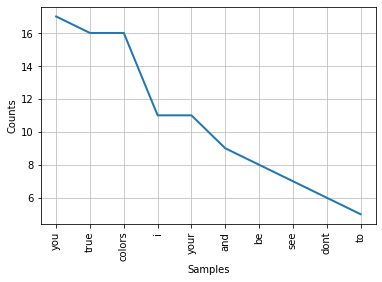

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [63]:
print("10 Most Frequent Words in True Colors by Cyndi Lauper:")
print(pop_songs_word_freq_dists[6].most_common(10))
pop_songs_word_freq_dists[6].plot(10)

10 Most Frequent Non–Stop Words in True Colors by Cyndi Lauper:
[('true', 16), ('colors', 16), ('see', 7), ('dont', 6), ('show', 5), ('shining', 4), ('thats', 4), ('love', 4), ('afraid', 4), ('let', 4)]


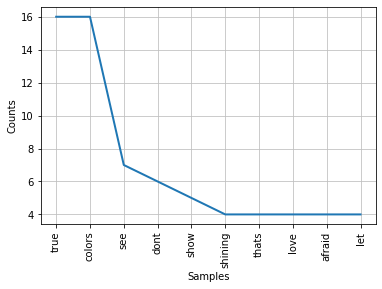

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [88]:
print("10 Most Frequent Non–Stop Words in True Colors by Cyndi Lauper:")
print(filtered_pop_songs_word_freq_dists[6].most_common(10))
filtered_pop_songs_word_freq_dists[6].plot(10)

10 Most Frequent Non–Stop Word Lancaster Stems in True Colors by Cyndi Lauper:
[('tru', 16), ('col', 16), ('nt', 7), ('see', 7), ('show', 5), ('shin', 4), ('lov', 4), ('afraid', 4), ('let', 4), ('tak', 3)]


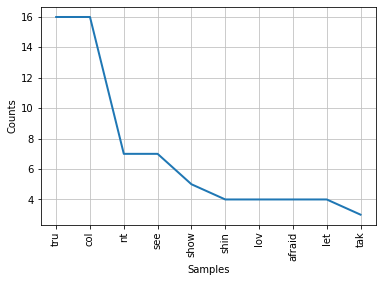

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [89]:
print("10 Most Frequent Non–Stop Word Lancaster Stems in True Colors by Cyndi Lauper:")
print(pop_songs_lancaster_stems_freq_dists[6].most_common(10))
pop_songs_lancaster_stems_freq_dists[6].plot(10)

10 Most Frequent Non–Stop Word Porter Stems in True Colors by Cyndi Lauper:
[('true', 16), ('color', 16), ('nt', 7), ('see', 7), ('show', 5), ('shine', 4), ('love', 4), ('afraid', 4), ('let', 4), ('world', 3)]


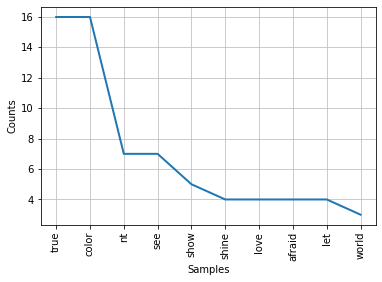

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [66]:
print("10 Most Frequent Non–Stop Word Porter Stems in True Colors by Cyndi Lauper:")
print(pop_songs_porter_stems_freq_dists[6].most_common(10))
pop_songs_porter_stems_freq_dists[6].plot(10)

10 Most Frequent Words in It's Tricky by Run-DMC:
[('tricky', 40), ('its', 23), ('a', 22), ('to', 20), ('rhyme', 20), ('rock', 19), ('on', 12), ('time', 12), ('thats', 9), ('right', 9)]


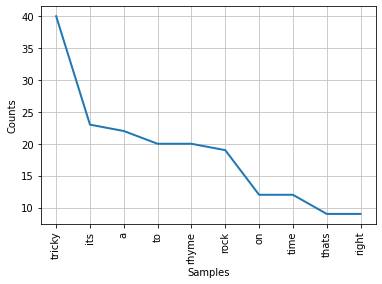

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [67]:
print("10 Most Frequent Words in It's Tricky by Run-DMC:")
print(hip_hop_songs_word_freq_dists[2].most_common(10))
hip_hop_songs_word_freq_dists[2].plot(10)

10 Most Frequent Non–Stop Words in It's Tricky by Run-DMC:
[('tricky', 40), ('rhyme', 20), ('rock', 19), ('time', 12), ('thats', 9), ('right', 9), ('cos', 6), ('im', 5), ('think', 3), ('people', 3)]


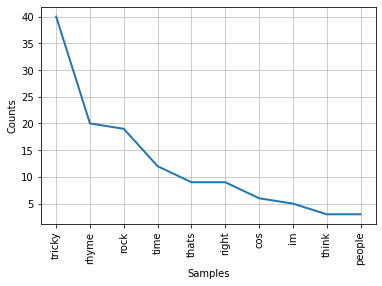

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [107]:
print("10 Most Frequent Non–Stop Words in It's Tricky by Run-DMC:")
print(filtered_hip_hop_songs_word_freq_dists[2].most_common(10))
filtered_hip_hop_songs_word_freq_dists[2].plot(10)

10 Most Frequent Non–Stop Word Lancaster Stems in It's Tricky by Run-DMC:
[('tricky', 40), ('rhym', 20), ('rock', 19), ('tim', 12), ('right', 9), ('cos', 6), ('nt', 5), ('think', 3), ('real', 3), ('girl', 3)]


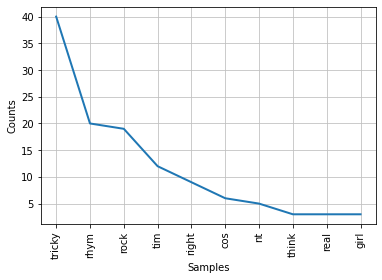

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [108]:
print("10 Most Frequent Non–Stop Word Lancaster Stems in It's Tricky by Run-DMC:")
print(hip_hop_songs_lancaster_stems_freq_dists[2].most_common(10))
hip_hop_songs_lancaster_stems_freq_dists[2].plot(10)

10 Most Frequent Non–Stop Word Porter Stems in It's Tricky by Run-DMC:
[('tricki', 40), ('rhyme', 20), ('rock', 19), ('time', 12), ('right', 9), ('co', 6), ('nt', 5), ('think', 3), ('girl', 3), ('peopl', 3)]


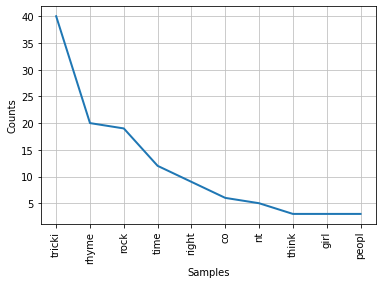

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [70]:
print("10 Most Frequent Non–Stop Word Porter Stems in It's Tricky by Run-DMC:")
print(hip_hop_songs_porter_stems_freq_dists[2].most_common(10))
hip_hop_songs_porter_stems_freq_dists[2].plot(10)